In [1]:
import pandas as pd
import numpy as np
import os, io
import csv

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('recommend.csv',header=None)

In [3]:
data

,0,1,2,3,4,5,6
0,000003_1,100,20,25,1,0,0
1,000011_1,100,10,15,0,1,1
2,000013_1,-100,15,20,1,0,1
3,000108_1,100,20,25,0,1,1
4,000254_1,-100,15,20,0,1,1
...,...,...,...,...,...,...,...
77,008538_1,100,18,27,1,0,1
78,008774_1,100,15,24,0,1,0
79,011962_1,100,16,22,1,1,0
80,017008_1,100,18,25,1,0,1


In [4]:
# Exception Handeling for Data Sorting in pandas
pd.options.mode.chained_assignment = None

In [5]:
x = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [6]:
from sklearn.cluster import KMeans

In [7]:
import matplotlib.pyplot as plt
wcss=[]
for i in range(5,35): 
     print(i," start")
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(x)
     wcss.append(kmeans.inertia_)

5  start
6  start
7  start
8  start
9  start
10  start
11  start
12  start
13  start
14  start
15  start
16  start
17  start
18  start
19  start
20  start
21  start
22  start
23  start
24  start
25  start
26  start
27  start
28  start
29  start
30  start
31  start
32  start
33  start
34  start


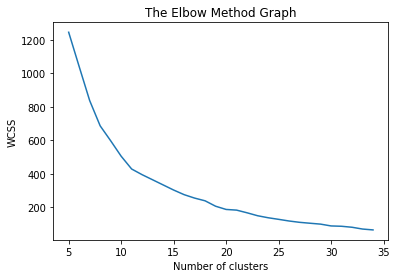

In [8]:
plt.plot(range(5,35),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=10,n_init=1000)
kmeans.fit(x,y)

KMeans(n_clusters=10, n_init=1000)

In [44]:
kmeans.labels_
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
dict_data

{0: 4, 1: 13, 2: 9, 3: 9, 4: 10, 5: 4, 6: 3, 7: 6, 8: 13, 9: 11}

In [19]:
import matplotlib.pyplot as plt

In [45]:
y_kmeans = kmeans.predict(x)
test = data.copy()
test['7']=y_kmeans
test.to_csv('rec.csv')

In [47]:
kmeans.predict(np.array([[-100,20,25,0,0,1]]))[0]

8

In [48]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kmeans, file)

In [1]:

import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
y

In [ ]:
data = X_train.copy()
data["item"] = y_train
data["cluster"] = kmeans.labels_

In [ ]:
data

,age,size,heightCM,weightLbs,body type,item,cluster
22230,34.0,8,162.56,132.000000,4,1730182,0
94535,40.0,28,167.64,137.343865,3,671958,9
29378,29.0,16,167.64,180.000000,7,254493,6
5858,44.0,14,165.10,137.343865,1,1383321,5
44769,53.0,24,167.64,182.000000,1,1090219,1
...,...,...,...,...,...,...,...
35044,32.0,16,162.56,145.000000,3,815826,10
22661,47.0,8,160.02,130.000000,5,493510,13
10369,26.0,28,170.18,190.000000,1,795320,1
51000,43.0,20,170.18,160.000000,4,1717449,14


/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


KeyError: ignored

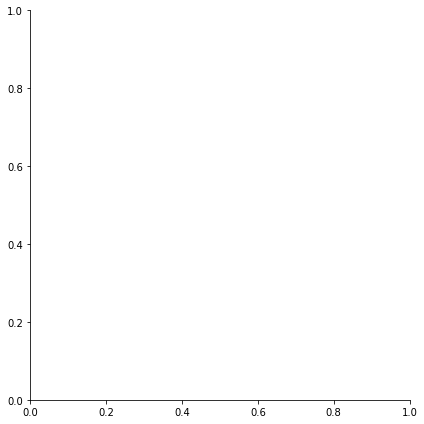

In [ ]:
sns.lmplot(data=data[1:1000], hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.50


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train, y_train)
print('Accuracy of Random forest classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of Random forest classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of Random forest classifier on training set: 0.90
Accuracy of Random forest classifier on test set: 0.57


**Call functions on test data**

In [ ]:
age_Preprocessed_testdata=preprocessAge(test)
testdata_bust_size_cleansed=preprocessBustsize(age_Preprocessed_testdata)
testdata_bust_size_cleansed=preprocessHeight(testdata_bust_size_cleansed)
testdata_bust_size_cleansed=preprocessWeight(testdata_bust_size_cleansed)
testdata_bust_size_cleansed=preprocessRentedFor(testdata_bust_size_cleansed)
cleansedTestData=preprocessBodytype(testdata_bust_size_cleansed)
final_test_df=createFinalTestDataframe(cleansedTestData)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [ ]:
feature_names = ['age', 'bust Size1','bust1','size','heightCM','weightLbs','rented for','user_id']
testdata = final_test_df[feature_names]

**For each test data instance, predict body type using classifier, then cluster based on body type and rented for, then predict rating for each item id, then recommend highest rating item id**

In [ ]:
for i in range(5):#len(testdata)
    age = testdata.iloc[i,0]
    bustSize1 = testdata.iloc[i,1]
    bust1 = testdata.iloc[i,2]
    size = testdata.iloc[i,3]
    heightCM = testdata.iloc[i,4]
    weightLbs = testdata.iloc[i,5]
    
    xnew=[[age,bustSize1,bust1,size,heightCM,weightLbs]]
    bodytypenumber=model.predict(xnew)
    #print("Predicted body type:",bodytypenumber)
    
    bodytypearray=["NaN","hourglass", "straight & narrow", "pear","athletic", "full bust","petite", "apple"]
    bodytype=np.asanyarray(bodytypearray)[bodytypenumber]
    print("Predicted body type:",bodytype)
    
    cluster_df=cleansedData.copy()
    groupedbybodytype = cluster_df.groupby('body type')
    for name,group in groupedbybodytype:
      if(bodytype==name):
        #print(name)
        #print(group)
        grouped_df=group.copy()
    rentedFor=testdata.iloc[i,6]
    
    groupedbybodytype = grouped_df.groupby('rented for')
    for name,group in groupedbybodytype:
      if(rentedFor==name):
        #print(name)
        #print(group)
        cf_df=group.copy()
    cf_df=cf_df[['user_id','item_id','rating']].copy()
    
    reader = Reader(rating_scale=(1,10))
    traindata=Dataset.load_from_df(cf_df,reader)
    trainingSet = traindata.build_full_trainset()
    
    svdAlgo = SVD(n_factors=200,n_epochs=50)
    svdAlgo.fit(trainingSet)
    
    itemid=cf_df['item_id'].unique()
    ratingOutput = pd.DataFrame(columns=['item_id', 'rating']) #Create a blank df with 2 columns at first and then append data
    
    for i in range(len(itemid)):
        user=cf_df.iloc[i,0] #User_id
        item=cf_df.iloc[i,1] #Item_id
        output=svdAlgo.predict(user,item,r_ui=None,clip=True,verbose=False)
        ratingOutput = ratingOutput.append({'item_id': item, 'rating': output.est}, ignore_index=True)
        
    ratingOutput=ratingOutput.sort_values('rating',ascending=False)
    outputdf=ratingOutput.head(10).copy()
    #print("Top 10 recommended items with their predicted ratings:")
    #outputdf.head()
    rawdf = pd.read_json ('renttherunway_final_data.json',lines=True)
    itemID=outputdf['item_id'].iloc[0].astype('int64')
    print("Recommended itemID:",itemID)
    finaldf = (rawdf[rawdf['item_id']==itemID].iloc[0])
    print("Recommended category:",finaldf['category'])

Predicted body type: ['full bust']
Recommended itemID: 1511014
Recommended category: dress
Predicted body type: ['pear']
Recommended itemID: 1883172
Recommended category: dress
Predicted body type: ['petite']
Recommended itemID: 125465
Recommended category: gown
Predicted body type: ['straight & narrow']
Recommended itemID: 567453
Recommended category: shift
Predicted body type: ['pear']
Recommended itemID: 1883172
Recommended category: dress
